In [1]:
import matplotlib.pyplot as plt # for plotting
import numpy as np # for transformation

import torch # PyTorch package
import torchvision # load datasets
import torchvision.transforms as transforms # transform data
import torch.nn as nn # basic building block for neural neteorks
import torch.nn.functional as F # import convolution functions like Relu
import torch.optim as optim # optimzer

In [2]:
transform = transforms.Compose( [transforms.ToTensor(), # to tensor object
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [3]:
import numpy as np
import pandas as pd

import os
import random
from operator import itemgetter
import copy
import time

import torch
import torchvision
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torchvision.transforms as transform
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset, ConcatDataset
import torch.nn as nn
import torchvision.models as models
from torchvision.utils import make_grid
import torch.nn.functional as F

#from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
#import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

device= torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [7]:
os.getcwd()

'/home/cchavesbeltran/app'

In [8]:
parent_dir = '/home/cchavesbeltran/app/data1/'
example = f'{parent_dir}cardboard/cardboard1.jpg'

Shape: (384, 512, 3)


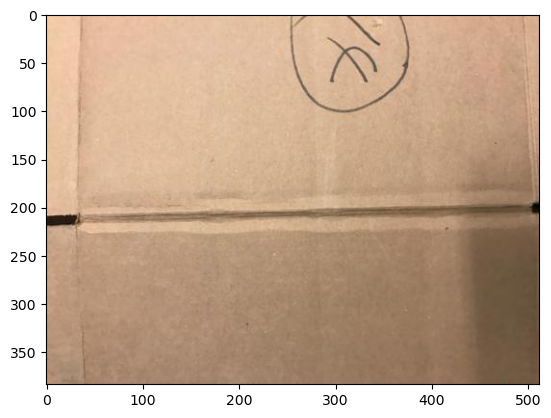

In [9]:
img = mpimg.imread(example)
print('Shape:', img.shape)
plt.imshow(img);

In [10]:
def plotHist(img):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.axis('off')
  histo = plt.subplot(1,2,2)
  histo.set_ylabel('Count')
  histo.set_xlabel('Pixel Intensity')
  plt.hist(img.flatten(), bins=10, lw=0, alpha=0.5, color='r')

In [11]:
transformer = {
    'original': transform.Compose([
        transform.Resize((224, 224)),
        transform.ToTensor(), 
        transform.Normalize((0.485, 0.456, 0.406),(0.229,0.224,0.225))
]), 
   'dataset1': transform.Compose([
       transform.Resize((224, 224)),
       transform.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
       transform.RandomRotation(5),
       transform.RandomAffine(degrees=11, translate=(0.1,0.1), scale=(0.8,0.8)),
       transform.ToTensor(),
       transform.Normalize((0.485, 0.456, 0.406),(0.229,0.224,0.225))
])
}

In [13]:
bs = 64

original = ImageFolder(f'{parent_dir}', transform=transformer['original'])

#all_set = train_val + test
train_val, test = train_test_split(original, test_size=0.2, shuffle=True, random_state=43)

#train_val = train + val + dataset1 + dataset2 + dataset3
train_val = ConcatDataset([train_val, 
                           ImageFolder(f'{parent_dir}', transform=transformer['dataset1'])]) 

train, val = train_test_split(train_val, test_size=0.1, shuffle=True, random_state=43)

loaders = {
    'train': DataLoader(train, batch_size=bs, num_workers=4, pin_memory=False),
    'val': DataLoader(val, batch_size=bs, num_workers=4, pin_memory=False),
    'test': DataLoader(test, batch_size=bs, num_workers=4, pin_memory=False)
}

dataset_sizes = {
    'train': len(train),
    'val': len(val), 
    'test': len(test),
}

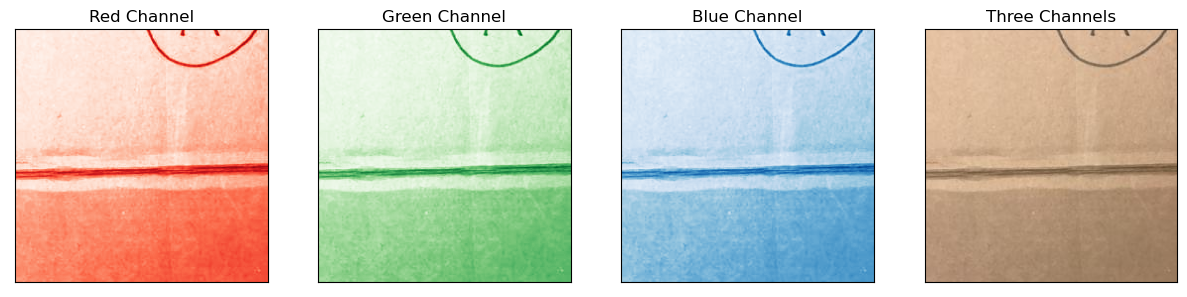

In [15]:
exampleset = ImageFolder(f'{parent_dir}', transform=transform.Compose([transform.ToTensor(),
                                                            transform.CenterCrop(255),]))

x, y = next(iter(DataLoader(exampleset)))

channels = ['Red', 'Green', 'Blue']
cmaps = [plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

fig, ax = plt.subplots(1, 4, figsize=(15, 10))

for i, axs in enumerate(fig.axes[:3]):
    axs.imshow(x[0][i,:,:], cmap=cmaps[i])
    axs.set_title(f'{channels[i]} Channel')
    axs.set_xticks([])
    axs.set_yticks([])
    
ax[3].imshow(x[0].permute(1,2,0))
ax[3].set_title('Three Channels')
ax[3].set_xticks([])
ax[3].set_yticks([]);

In [16]:
print('Classes:', original.classes)
print('Number of classes:', len(original.classes))

Classes: ['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic']
Number of classes: 6


In [43]:
dic = {}

for classes in original.classes:
  dic[classes] = [len([os.path.join(parent_dir+ classes, filename) for filename in os.listdir(parent_dir+classes)])]

samplesize = pd.DataFrame.from_dict(dic)

In [47]:
samplesize.values[0]

array([403, 997, 501, 410, 594, 482])

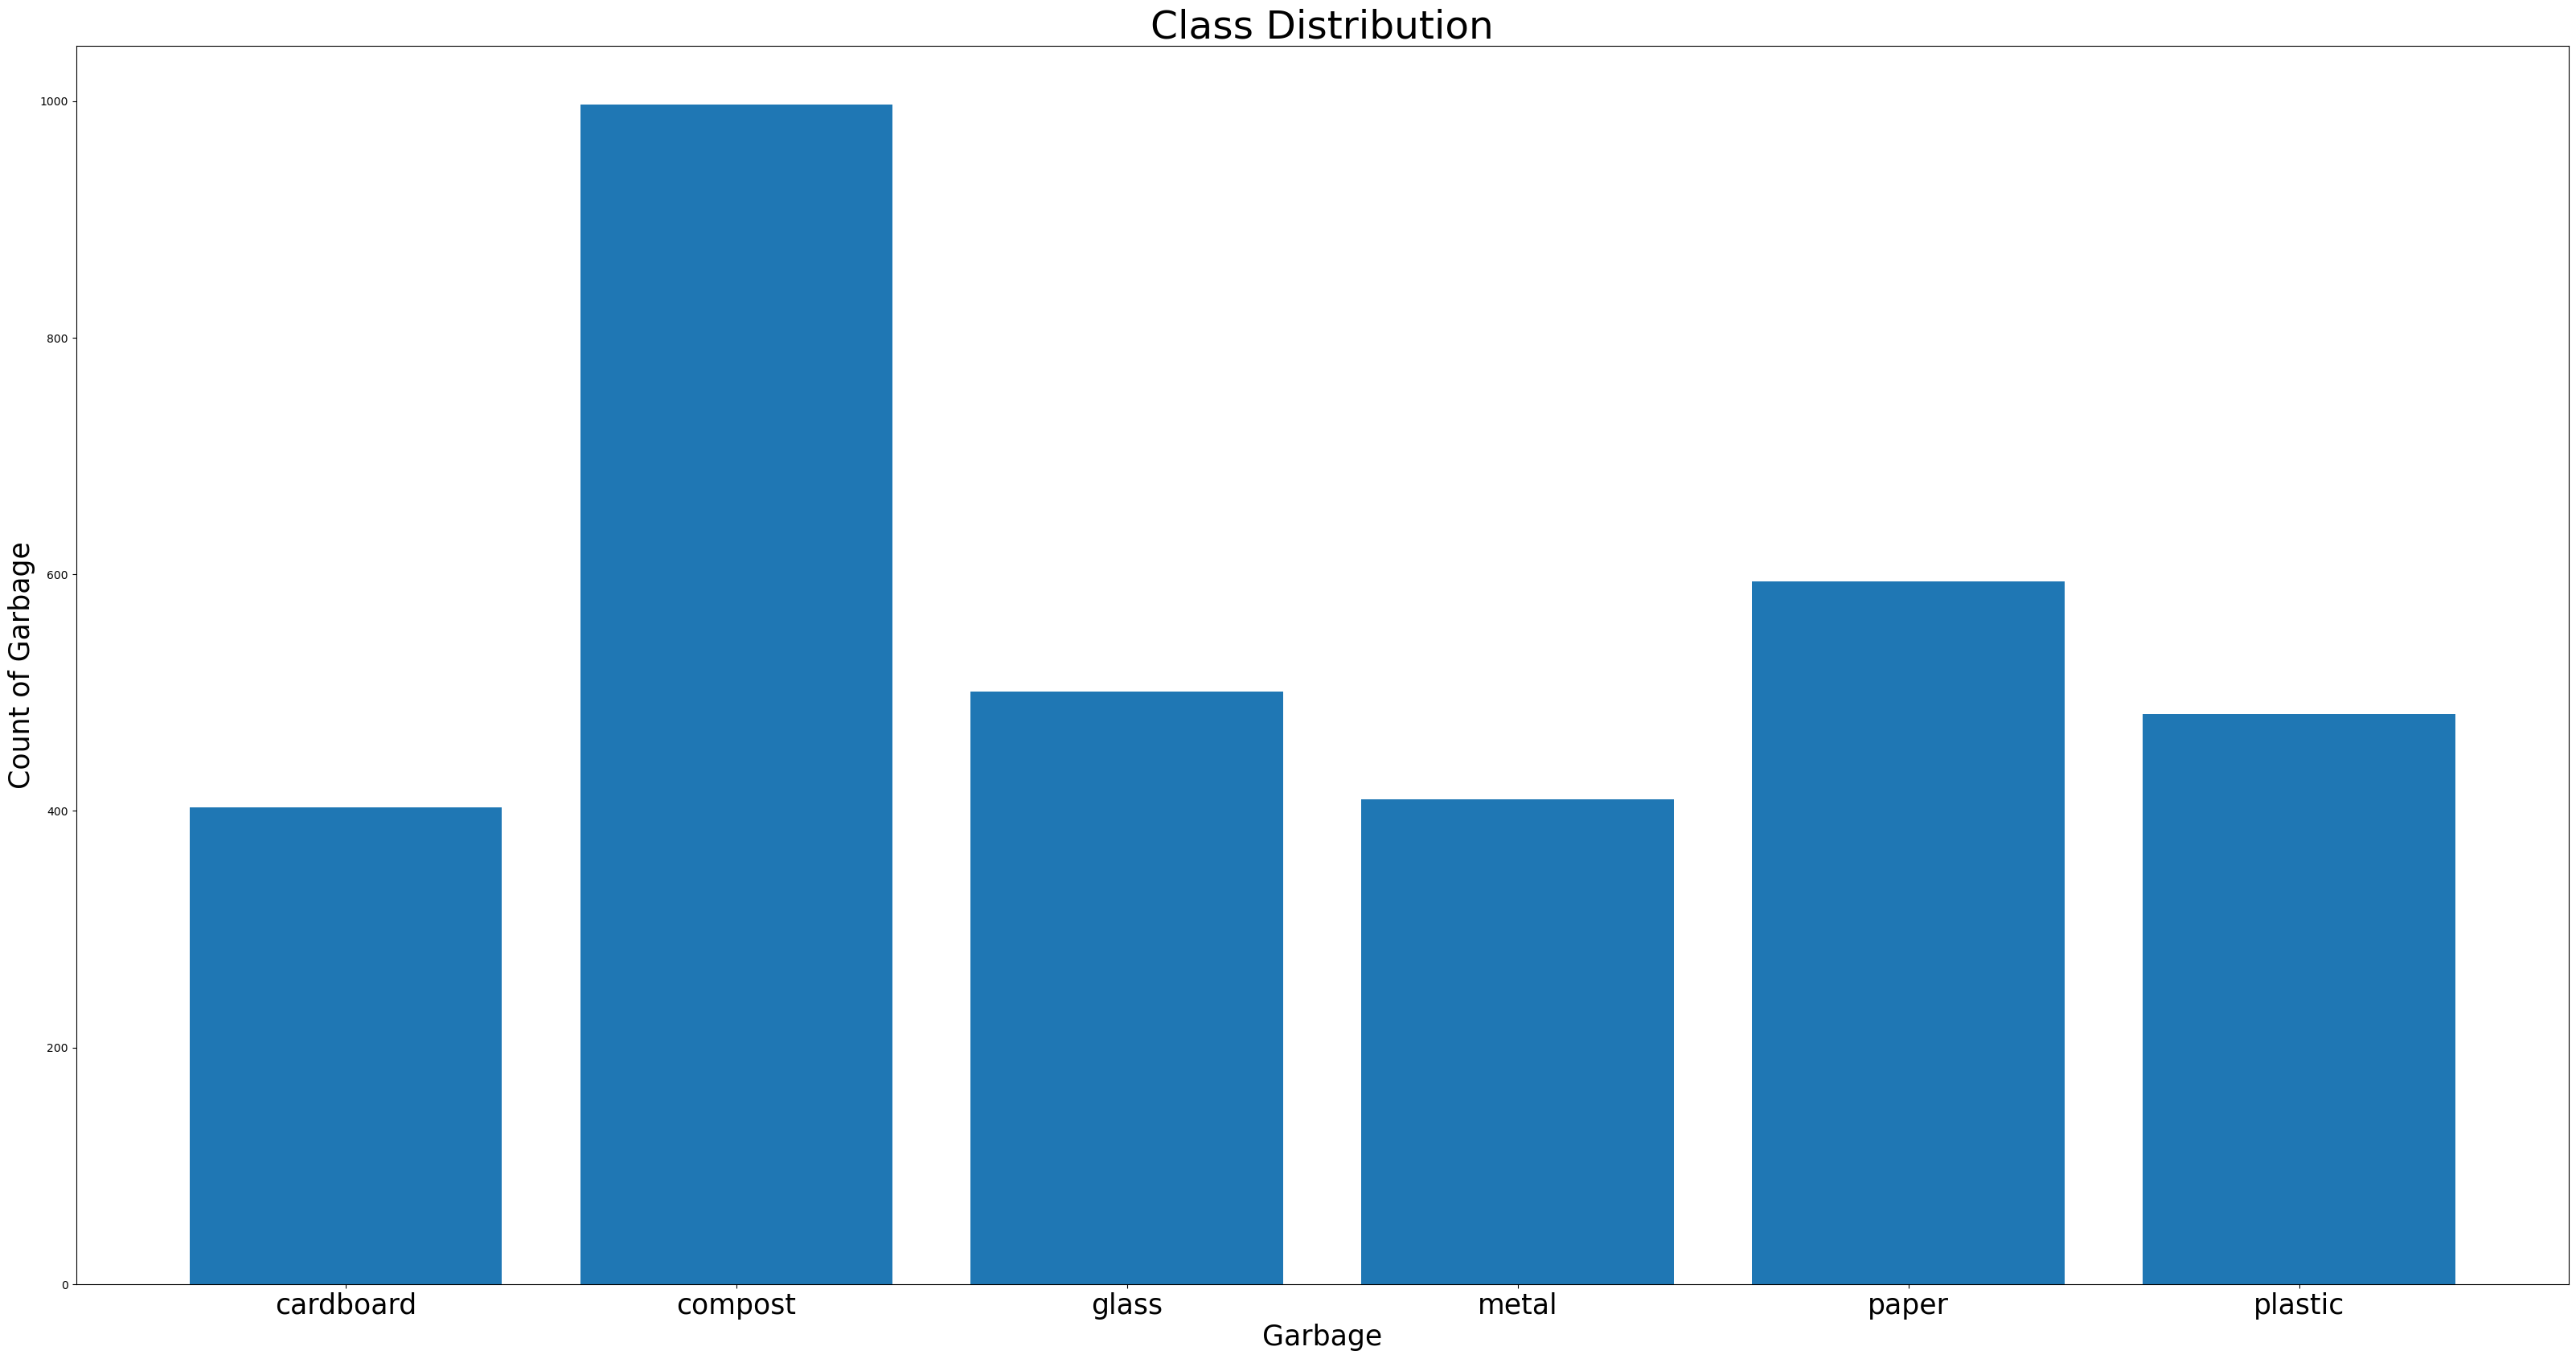

In [48]:
figure_size = plt.rcParams['figure.figsize']
figure_size[0] = 40
figure_size[1] = 20
plt.rcParams['figure.figsize'] = figure_size

# Replace 'samplesize' with your actual data
original_classes = samplesize.columns
samplesize = samplesize.values[0] # Example data for demonstration purposes only
 # Replace with your actual class labels

# Creating bar plot
index = np.arange(len(original_classes))
plt.bar(index, samplesize)

plt.xlabel('Garbage', fontsize=25)
plt.ylabel('Count of Garbage', fontsize=25)
plt.xticks(index, original_classes, fontsize=25)
plt.title('Class Distribution', fontsize=35)
plt.show()

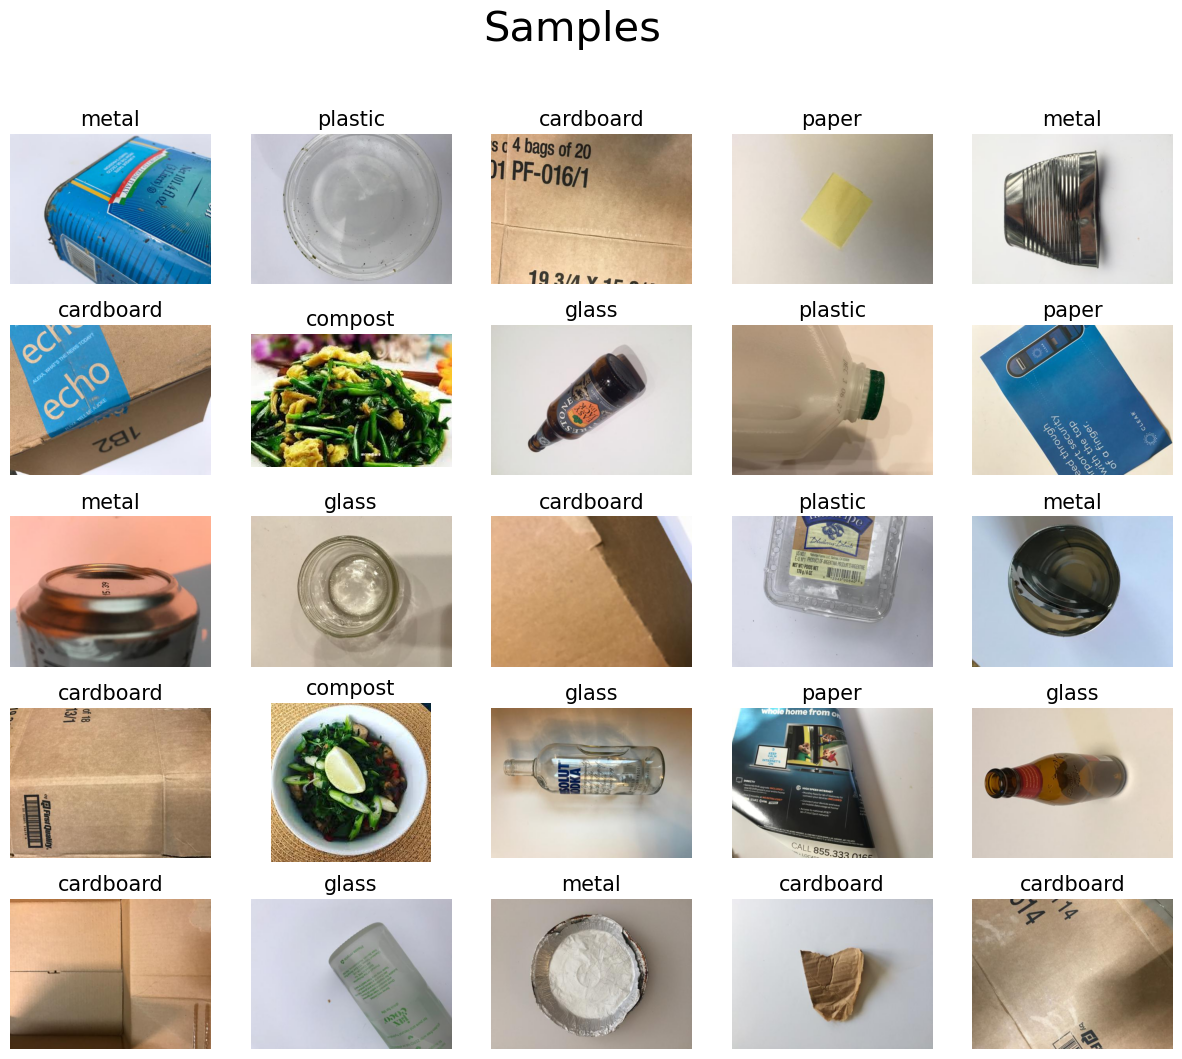

In [26]:
# Function for plotting samples
def plot_samples(samples):  
    fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(15,12))
    i = 0
    for row in range(5):
         for col in range(5):
                img = mpimg.imread(samples[i][0][0])
                ax[row][col].imshow(img)
                ax[row][col].axis('off')
                ax[row][col].set_title(samples[i][1], fontsize=15)
                i+=1
  

rand_samples = [] 
for _ in range(25): 
    classes = random.choice(original.classes)
    rand_samples.append([random.sample([os.path.join(parent_dir+classes, filename) for filename in os.listdir(parent_dir+classes)], 1), classes]) 
rand_samples[0]
plot_samples(rand_samples)
plt.suptitle('Samples', fontsize=30)
plt.show()

In [49]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1) 
    return torch.tensor(torch.sum(preds == labels).item() / len(preds)), preds

In [50]:
#save the losses for further visualization
losses = {'train':[], 'val':[]}
accuracies = {'train':[], 'val':[]}
lr = []

In [51]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7feb01513fd0>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7feb010e20b0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7feb010e2890>}

In [52]:
def train(seed, epochs, model):
    
  print('Creating a model {}...'.format(seed))

  model.to(device)  
  criterion = nn.CrossEntropyLoss()
  if seed==2:
    optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay = 1e-5)
  else:
    optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
  scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=3, verbose=True)
  #scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 0.1, epochs=epochs, steps_per_epoch=len(loaders['train']), cycle_momentum=True)
  #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 3, gamma=0.1)
  since = time.time()
  best_model = copy.deepcopy(model.state_dict())
  best_acc = 0.0
  for epoch in range(epochs):
    for phase in ['train', 'val']:
      if phase == 'train':
        model.train()
      else:
        model.eval()
      
      running_loss = 0.0
      running_corrects = 0.0

      for inputs, labels in loaders[phase]:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        with torch.set_grad_enabled(phase=='train'):
          outp = model(inputs)
          _, pred = torch.max(outp, 1)
          loss = criterion(outp, labels)
        
          if phase == 'train':
            loss.backward()
            optimizer.step()
#             lr.append(scheduler.get_lr())
#             scheduler.step()

        running_loss += loss.item()*inputs.size(0)
        running_corrects += torch.sum(pred == labels.data)

      if phase == 'train':
          acc = 100. * running_corrects.double() / dataset_sizes[phase]
          scheduler.step(acc)

      epoch_loss = running_loss / dataset_sizes[phase]
      epoch_acc = running_corrects.double()/dataset_sizes[phase]
      losses[phase].append(epoch_loss)
      accuracies[phase].append(epoch_acc)
      if phase == 'train':
        print('Epoch: {}/{}'.format(epoch+1, epochs))
      print('{} - loss:{}, accuracy{}'.format(phase, epoch_loss, epoch_acc))
      lr.append(scheduler._last_lr)
        
      if phase == 'val':
        print('Time: {}m {}s'.format((time.time()- since)//60, (time.time()- since)%60))
        print('=='*31)
      if phase == 'val' and epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model = copy.deepcopy(model.state_dict())
    #scheduler.step() 
  time_elapsed = time.time() - since
  print('CLASSIFIER TRAINING TIME {}m {}s'.format(time_elapsed//60, time_elapsed%60))
  print('=='*31)


  model.load_state_dict(best_model)

  for param in model.parameters():
        param.requires_grad=True

  optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)  
  scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.1, patience=2, verbose=True)
  #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 3, gamma=0.1)
  #scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 0.001, epochs=epochs, steps_per_epoch=len(loaders['train']), cycle_momentum=True)
  for epoch in range(epochs):
    for phase in ['train', 'val']:
      if phase == 'train':
        model.train()
      else:
        model.eval()
      
      running_loss = 0.0
      running_corrects = 0.0

      for inputs, labels in loaders[phase]:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        with torch.set_grad_enabled(phase=='train'):
          outp = model(inputs)
          _, pred = torch.max(outp, 1)
          loss = criterion(outp, labels)
        
          if phase == 'train':
            loss.backward()
            optimizer.step()
#             lr.append(scheduler.get_lr())
#             scheduler.step()

        running_loss += loss.item()*inputs.size(0)
        running_corrects += torch.sum(pred == labels.data)

      if phase == 'train':
        acc = 100. * running_corrects.double() / dataset_sizes[phase]
        scheduler.step(acc)

      epoch_loss = running_loss / dataset_sizes[phase]
      epoch_acc = running_corrects.double()/dataset_sizes[phase]
      losses[phase].append(epoch_loss)
      accuracies[phase].append(epoch_acc)
      if phase == 'train':
        print('Epoch: {}/{}'.format(epoch+1, epochs))
      print('{} - loss:{}, accuracy{}'.format(phase, epoch_loss, epoch_acc))
      lr.append(scheduler._last_lr)
    
      if phase == 'val':
        print('Time: {}m {}s'.format((time.time()- since)//60, (time.time()- since)%60))
        print('=='*31)    
      if phase == 'val' and epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model = copy.deepcopy(model.state_dict())
    #scheduler.step() 
  time_elapsed = time.time() - since
  print('ALL NET TRAINING TIME {}m {}s'.format(time_elapsed//60, time_elapsed%60))
  print('=='*31)

  model.load_state_dict(best_model)
  return model

In [53]:
densenet121_0 = torchvision.models.densenet121(pretrained=True)
for param in densenet121_0.parameters():
  param.requires_grad=False

densenet121_0.classifier = nn.Linear(in_features=densenet121_0.classifier.in_features, out_features=len(original.classes), bias=True)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /home/cchavesbeltran/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

In [54]:
convnext = torchvision.models.convnext_tiny (pretrained=True)
for param in convnext.parameters():
  param.grad_requires = False
convnext.classifier[2] = nn.Linear(in_features=768,out_features=6, bias=True)

Downloading: "https://download.pytorch.org/models/convnext_tiny-983f1562.pth" to /home/cchavesbeltran/.cache/torch/hub/checkpoints/convnext_tiny-983f1562.pth


  0%|          | 0.00/109M [00:00<?, ?B/s]

In [55]:
resnet101 = torchvision.models.resnet101(pretrained=True)
for param in resnet101.parameters():
  param.grad_requires = False

resnet101.fc = nn.Linear(in_features=resnet101.fc.in_features, out_features=len(original.classes), bias=True)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /home/cchavesbeltran/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [56]:
original.classes

['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic']

In [57]:
num_models = 3
epochs = 10

# models = [densenet121_0, densenet121_1, googlenet, resnet101, vgg19_bn]
models = [convnext, densenet121_0,resnet101]

for seed in range(num_models):
   train(seed=seed, epochs=epochs, model=models[seed])

Creating a model 0...
Epoch: 1/10
train - loss:0.5923697113925595, accuracy0.8534451330659861
val - loss:0.3199065155670291, accuracy0.9
Time: 2.0m 18.558950901031494s
Epoch: 2/10
train - loss:0.2534265409865781, accuracy0.9285453882610281
val - loss:0.25754868290463434, accuracy0.9163934426229509
Time: 4.0m 33.55327129364014s
Epoch: 3/10
train - loss:0.19843420818192742, accuracy0.943492526430915
val - loss:0.22414117704649442, accuracy0.9245901639344263
Time: 6.0m 48.20403695106506s
Epoch: 4/10
train - loss:0.16255274589940488, accuracy0.95260663507109
val - loss:0.21029557326778037, accuracy0.9278688524590164
Time: 9.0m 2.9054388999938965s
Epoch: 5/10
train - loss:0.14044499493703502, accuracy0.9611738971928545
val - loss:0.1932417602324095, accuracy0.9295081967213115
Time: 11.0m 17.442739963531494s
Epoch: 6/10
train - loss:0.12444787892413496, accuracy0.963908129784907
val - loss:0.1855569820912158, accuracy0.9327868852459016
Time: 13.0m 32.31510090827942s
Epoch: 7/10
train - loss: